In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.preprocessing import normalize
import scanpy as sc
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
#dataset reading
data = sc.read_h5ad("Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad")

In [3]:
covidX   = data.X    #data
covidOBS = data.obs  #patients data
covidVAR = data.var  #gene names
#there is also a section called data.uns in which there are the info about the dataset
covidX = normalize(covidX) #data normalization

In [4]:
covidX.shape,covidOBS.shape,covidVAR.shape #it returns the size of the np arrays

((44721, 26361), (44721, 22), (26361, 7))

In [5]:
#creating a DF which contain covidX as data, patients as rows and genes as columns
patients = covidOBS.index
genes = covidVAR.index
df = pd.DataFrame(data = covidX, index = patients, columns = genes)
df

,5S-rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A4GALT,A4GNT,...,TRBJ2-6,TRBV10-1,TRBV6-4,TRBV6-8,TTLL13,UGT2B17,Vault,XX-CR54.1,XXbac-B135H6.18,ZBTB40-IT1
covid_555_1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
covid_555_1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
covid_555_1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
covid_555_1.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
covid_555_1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HIP045.2543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HIP045.2544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HIP045.2545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HIP045.2546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
color = [] #define color array
MyData = []
for i in range(len(covidOBS)):
    color.append(covidOBS["Status"][i])
    MyData.append(covidX[i])
#for each status it is assigned a color (COVID = orange, Healthy = aqua)
for i in range(len(color)):
    if color[i] == 'COVID':
        color[i] = '#ffa500'
    else:
        color[i] = '#00ffff'

In [7]:
color = np.array(color) #list to np array

In [8]:
Umap_covidX = UMAP().fit_transform(MyData) #UMAP application

/anaconda/envs/py37_pytorch/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 10001. The TBB threading layer is disabled.
  warnings.warn(problem)


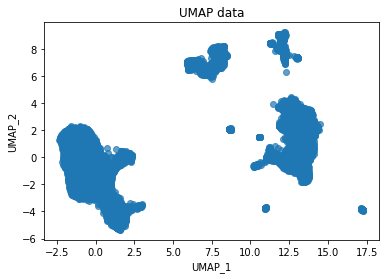

In [9]:
plt.scatter(Umap_covidX[:,0],Umap_covidX[:,1],alpha=0.7)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("UMAP data")
plt.show()

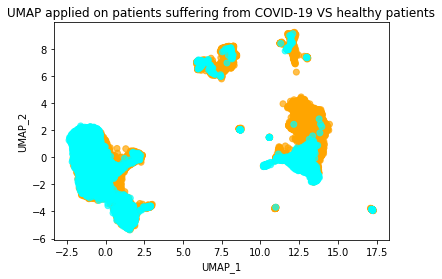

In [10]:
plt.scatter(Umap_covidX[:,0],Umap_covidX[:,1],alpha=0.7,c=color)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("UMAP applied on patients suffering from COVID-19 VS healthy patients")
plt.show()

In [11]:
db = DBSCAN().fit(Umap_covidX)

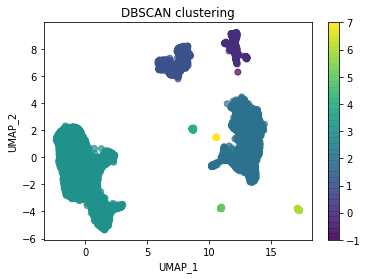

In [12]:
plt.scatter(Umap_covidX[:, 0],Umap_covidX[:, 1],alpha=.7,c=db.labels_)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.colorbar()
plt.title("DBSCAN clustering");

In [13]:
km = KMeans(n_clusters = 8, random_state = 42)
km.fit(Umap_covidX)

KMeans(random_state=42)

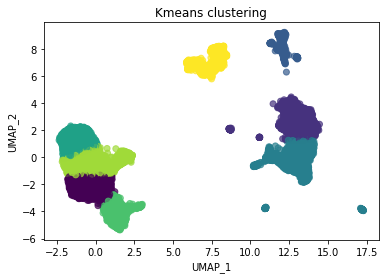

In [14]:
plt.scatter(Umap_covidX[:, 0],Umap_covidX[:, 1],alpha=.7,c=km.labels_)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("Kmeans clustering");

In [15]:
color_1 = [] #define color array
vent_nvent = []
for i in range(len(covidOBS)):
    if covidOBS["Status"][i] == 'COVID':
        vent_nvent.append(covidX[i])
        color_1.append(covidOBS["Ventilated"][i])
#for each ventilation condition it is assigned a color (Ventilated = orange, Non-ventilated = aqua)
for i in range(len(color_1)):
    if color_1[i] == 'Vent':
        color_1[i] = '#ffa500'
    else:
        color_1[i] = '#00ffff'

In [16]:
Umap_vent_nvent = UMAP().fit_transform(vent_nvent) #UMAP application

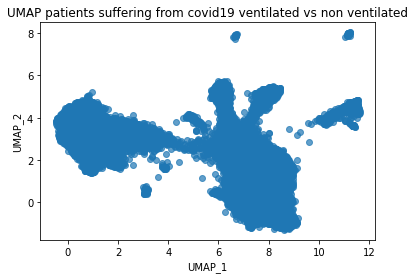

In [63]:
plt.scatter(Umap_vent_nvent[:,0],Umap_vent_nvent[:,1],alpha=0.7)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("UMAP patients suffering from covid19 ventilated vs non ventilated")
plt.show()

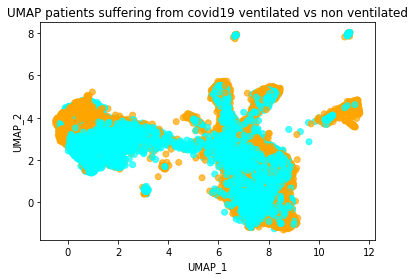

In [64]:
plt.scatter(Umap_vent_nvent[:,0],Umap_vent_nvent[:,1],alpha=0.7,c=color_1)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("UMAP patients suffering from covid19 ventilated vs non ventilated")
plt.show()